<h2>
Samuel Vara
<br>
GitHub: @samuelvara
<br>
</h2>

In [7]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import matplotlib.cm as cm
import seaborn as sns
from tqdm import tqdm

In [8]:
all_models = []

<h3>(a) Download the Vertebral Column Data Set from: <a>https://archive.ics.uci.edu/ml/datasets/Vertebral+Column</a></h3>

In [9]:
cols = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'label']

df = pd.read_csv(open('../../data/vertebral_column_data/column_2C.dat'), sep=' ', header = None)
df.columns = cols
df = df[(df.label=='AB') | (df.label=='NO')]

df['label'].replace('NO', 0, inplace=True)
df['label'].replace('AB', 1, inplace=True)

<h3>(b) Pre-Processing and Exploratory data analysis </h3>

<h5>i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1. <h5>

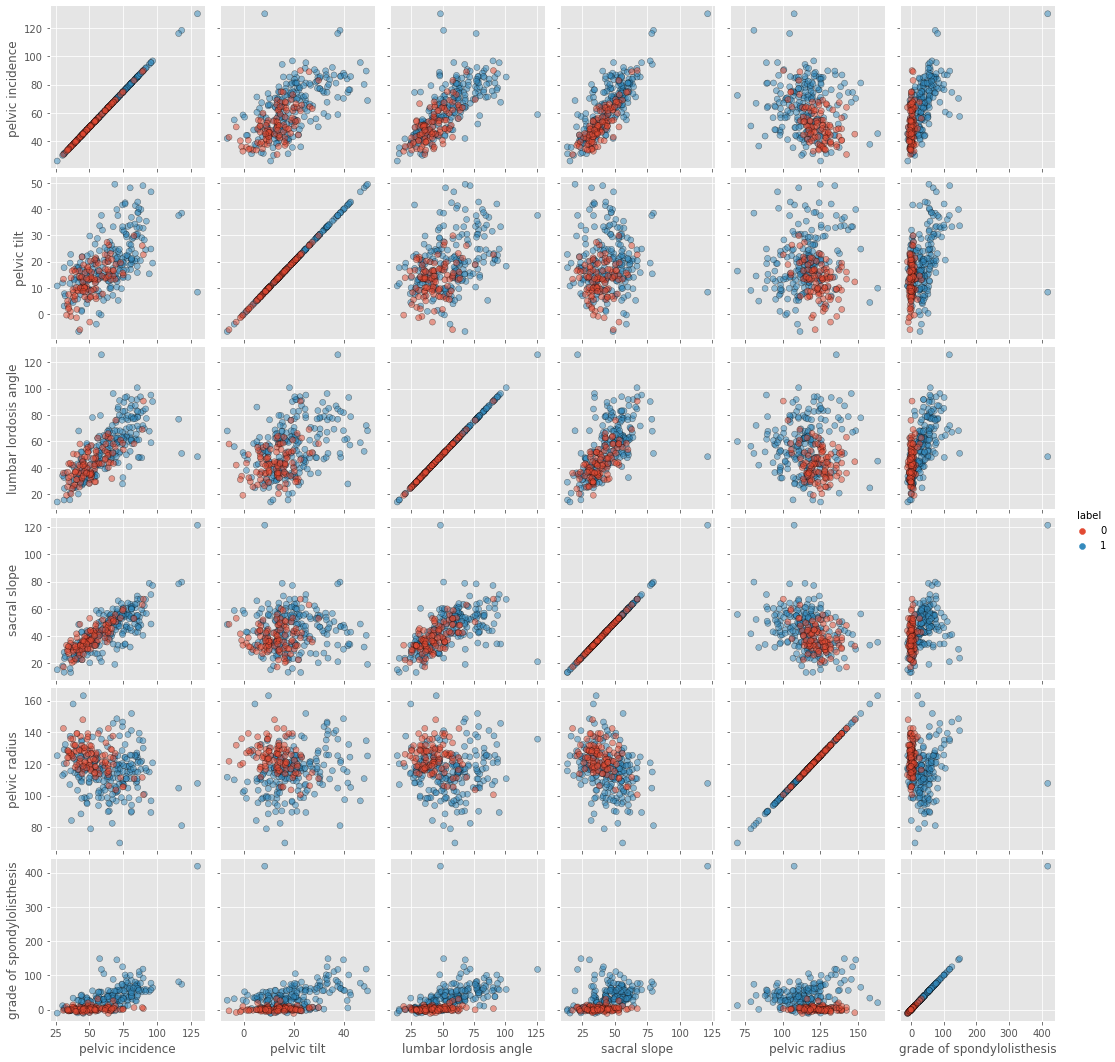

In [10]:
sns.pairplot(df, diag_kind = None, hue = 'label', plot_kws={'alpha':0.5, 'edgecolor': 'k'})

<h5>ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1</h5>

In [ ]:

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 7))

for i, col in enumerate(cols[:-1]):
    sns.boxplot(data=df, x='label', y=col, hue='label', ax=axs[i//3][i%3])

<h5>iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.</h5>

In [12]:
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

df_train = pd.concat([df_0[:70], df_1[:140]])
df_test = pd.concat([df_0[70:], df_1[140:]])

<h3>(c) Classification using KNN on Vertebral Column Data Set</h3>

In [13]:
X_train = np.array(df_train.drop('label', axis=1))
y_train = np.array(df_train['label'])
X_test = np.array(df_test.drop('label', axis=1))
y_test = np.array(df_test['label'])

<h5>i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).</h5>

In [14]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def KNN(n, X, Y, p=2, metric='minkowski', distance='uniform'):
    if metric == 'mahalanobis':
        neigh = KNeighborsClassifier(n_neighbors=n, metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(X_train.T))})
    else:
        neigh = KNeighborsClassifier(n_neighbors=n, p=p, weights=distance)

    model = neigh.fit(X, Y)    

    train_errors = 1.0-model.score(X, Y)
    test_errors = 1.0-model.score(X_test, y_test)

    return model, train_errors, test_errors

<h5>ii. Write code for k-nearest neighbors with Euclidean metric (or use a software package).</h5>

In [16]:
all_errors_train = []
all_errors_test = []
all_k = []
optimal_k = None
optimal_model = None
optimal_errors = float('inf')

for k in tqdm(range(208, 0, -3)):
    model, errors_k_train, errors_k_test = KNN(k, X_train, y_train)
    if k == 0:
        print(errors_k_train)
    all_errors_train.append(errors_k_train)
    all_errors_test.append(errors_k_test)
    all_k.append(k)
    all_models.append((errors_k_train, errors_k_test, k, 2, len(X_train), len(X_test)))
    if errors_k_test < optimal_errors:
        optimal_k = k 
        optimal_errors = errors_k_test
        optimal_model = model

100%|██████████| 70/70 [00:01<00:00, 38.96it/s]


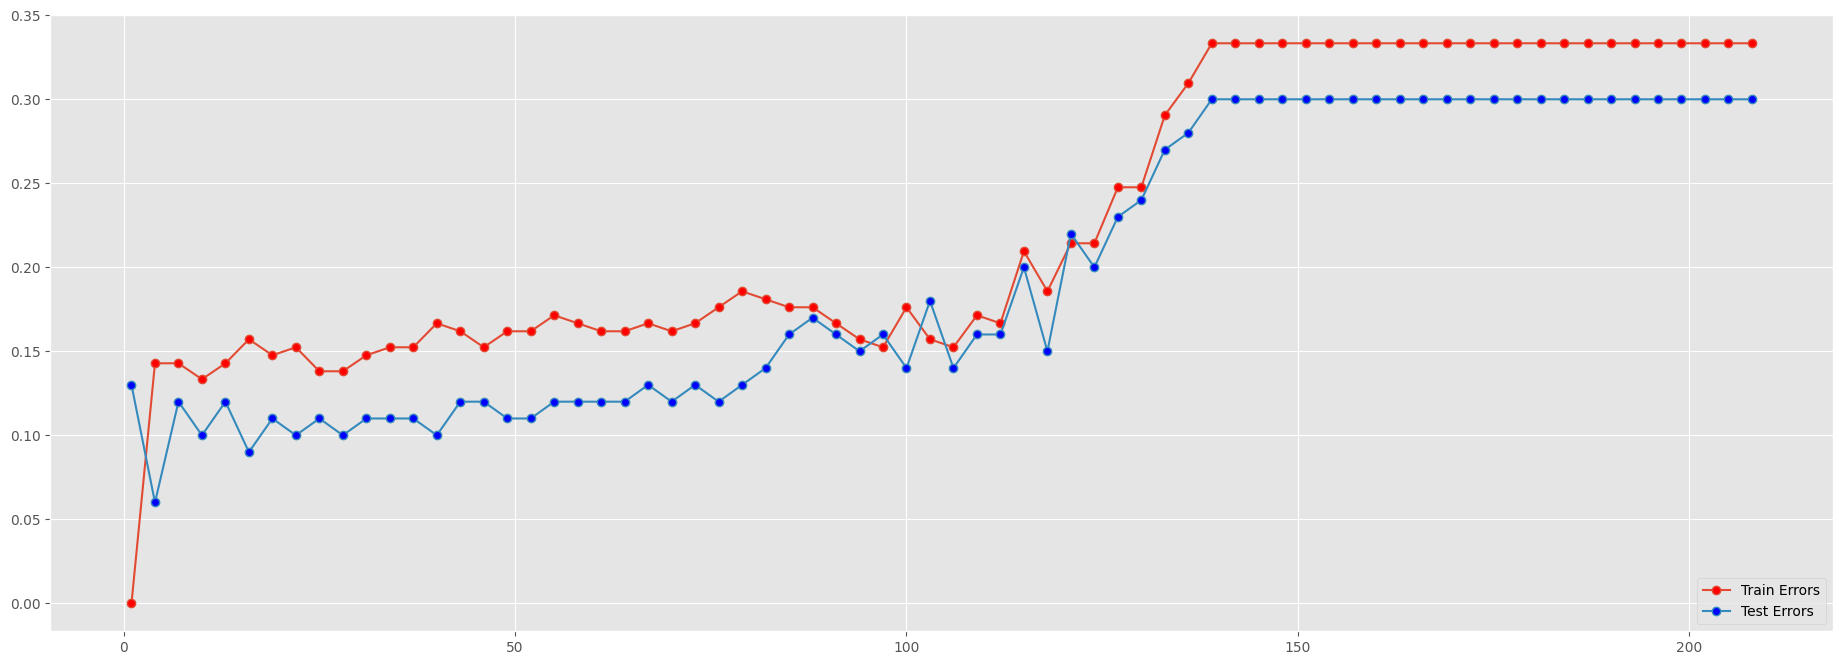

In [17]:
plt.figure(figsize=(23,8))
plt.plot(all_k, all_errors_train, marker='o', markerfacecolor='red')
plt.plot(all_k, all_errors_test, marker='o', markerfacecolor='blue')
plt.legend(["Train Errors", "Test Errors"], loc ="lower right")
plt.show()

In [19]:
print(f'k*: {optimal_k}')

k*: 4


True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision:  0.9324324324324325
F1 Score: 0.9583333333333333


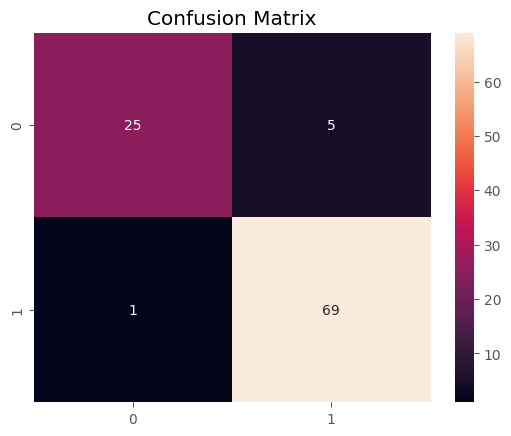

In [20]:
from sklearn.metrics import confusion_matrix, f1_score

preds = optimal_model.predict(X_test)

cm = confusion_matrix(y_test, preds, labels=[0,1])

TN, FP, FN, TP = cm.ravel()

TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)
PRE = TP / (TP + FP)
ACC = (TP+TN)/(TP+FP+FN+TN)
F1 = f1_score(y_test, preds)

print(f'True Positive Rate: {TPR}') 
print(f'True Negative Rate: {TNR}')
print(f'Precision:  {PRE}')
print(f'F1 Score: {F1}')

ax = plt.axes()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

<h5>iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. 

Note: for each N , select your training set by choosing the first bN/3c rows of Class 0 and the first N −bN/3crows of Class 1 in the training set you created in 1(b)iii. Also, for each N , select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve.</h5>

In [23]:
all_N = []
best_errors = []

for N in tqdm(range(10, 211, 10)):
    df_train_new = pd.concat([df_0[:70][:N//3], df_1[:140][:(N-N//3)]])
    X_train_new = np.array(df_train_new.drop('label', axis=1))
    y_train_new = np.array(df_train_new['label'])
    best_error = float('inf')
    
    for k in range(1, N+1, 5):
        _, errors_k_train, errors_k_test = KNN(k, X_train_new, y_train_new)
        best_error = min(best_error, errors_k_test)
        all_models.append((errors_k_train, errors_k_test, k, 2, len(X_train_new), len(X_test)))
    
    all_N.append(N)
    best_errors.append(best_error)

100%|██████████| 21/21 [00:09<00:00,  2.33it/s]


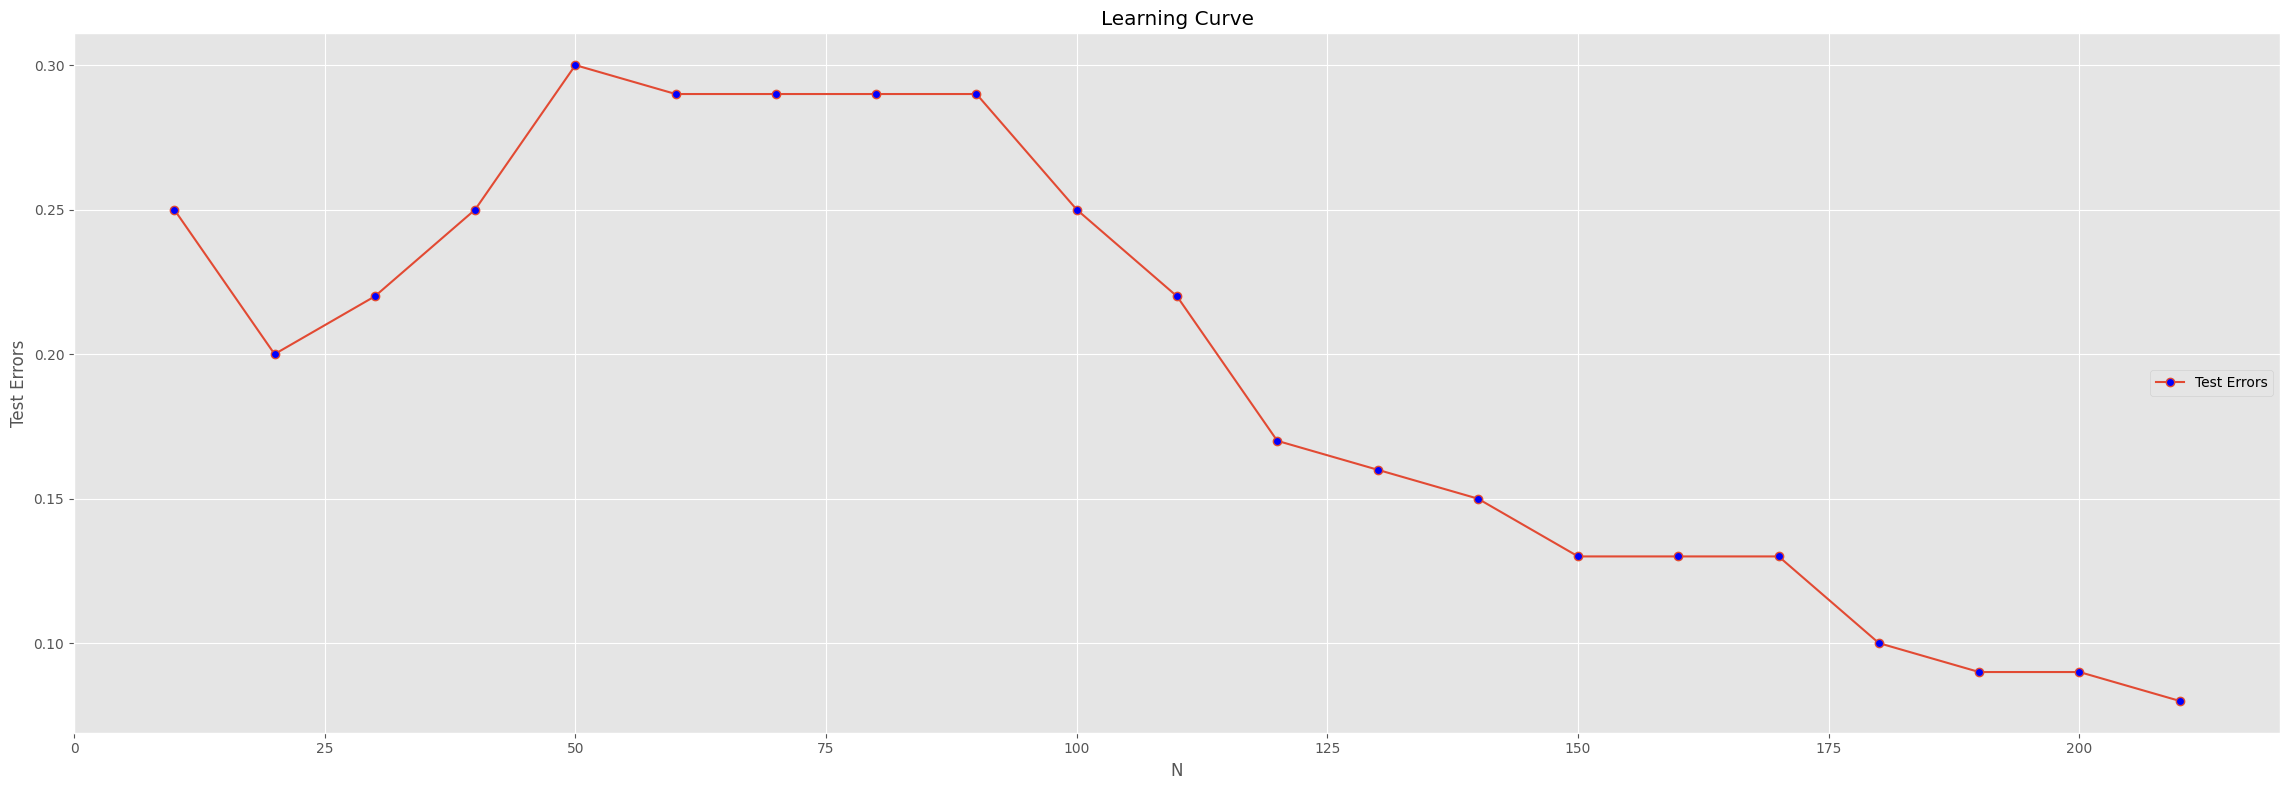

In [24]:
plt.figure(figsize=(23,8))
plt.plot(all_N, best_errors, marker='o', markerfacecolor='blue')
plt.xlabel('N')
plt.ylabel('Test Errors')
plt.legend(['Test Errors'], loc='center right')
plt.title('Learning Curve')
plt.tight_layout()
plt.show()

<h3>(d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.</h3>

In [25]:
d_data = {}

<h5>i. Minkowski Distance:</h5>

A. which becomes Manhattan Distance with p = 1

In [26]:
optimal_k = None
optimal_error = float('inf')

for k in tqdm(range(1, 197, 5)):
    _, errors_k_train, errors_k_test = KNN(k, X_train, y_train, p=1)

    all_models.append((errors_k_train, errors_k_test, k, 1, len(X_train), len(X_test)))
    if errors_k_test < optimal_error:
        optimal_error = errors_k_test
        optimal_k = k 

d_data[1] = (optimal_error, optimal_k)

print('Best K value (k*):', optimal_k)

100%|██████████| 40/40 [00:00<00:00, 59.72it/s] 

Best K value (k*): 6


B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [27]:
optimal_p = None
optimal_error = float('inf')

lp = 0.1

while lp<=1.0:
    _, error_k_train, error_k_test = KNN(optimal_k, X=X_train, Y=y_train, p=10**lp)
    all_models.append((error_k_train, error_k_test, k, 1, len(X_train), len(X_test)))
    if error_k_test < optimal_error:
        optimal_error = error_k_test
        optimal_p = lp
    lp += 0.1
    
d_data[optimal_p] = (optimal_error, optimal_k)

print('Best Log(p):', optimal_p)

Best Log(p): 0.6


In [28]:
optimal_k = None
optimal_error = float('inf')

for k in tqdm(range(1, 197, 5)):
    _, errors_k_train, errors_k_test = KNN(k, X_train, y_train, p=float('inf'))
    all_models.append((errors_k_train, errors_k_test, k, 1, len(X_train), len(X_test)))

    if errors_k_test < optimal_error:
        optimal_error = errors_k_test
        optimal_k = k 

d_data[float('inf')] = (optimal_error, optimal_k)

print('Best K value (k*):', optimal_k)

100%|██████████| 40/40 [00:00<00:00, 51.74it/s]

Best K value (k*): 16


<h5>ii. Mahalanobis Distance.</h5>

In [29]:
optimal_k = None
optimal_error = float('inf')

for k in range(1, 197, 5):
    _, errors_k_train, errors_k_test = KNN(k, X_train, y_train, metric='mahalanobis')
    all_models.append((errors_k_train, errors_k_test, k, 99, len(X_train), len(X_test)))

    if errors_k_test < optimal_error:
        optimal_error = errors_k_test
        optimal_k = k 

d_data[99] = (optimal_error, optimal_k)
print('Best K value (k*):', optimal_k)

Best K value (k*): 1


In [31]:
names = {1:'Mahattan', 2:'Euclidean', float('inf'):'Chebyshev', 99:'Mahalanobis', optimal_p:'Log P'}

print('+-------------------------------------------------------+')
print(f'|{"Name":<13}|{"P":^13}|{"Best Test Error":^21}|{"K":^5}|')
print('+-------------------------------------------------------+')
for p, (test_error, k) in d_data.items():
    print(f'|{names[p]:<13}|{p if p!=99 else "":^13}|{test_error:^21}|{k:^5}|')
print('+-------------------------------------------------------+')

+-------------------------------------------------------+
|Name         |      P      |   Best Test Error   |  K  |
+-------------------------------------------------------+
|Mahattan     |      1      | 0.10999999999999999 |  6  |
|Log P        |     0.6     | 0.06000000000000005 |  6  |
|Chebyshev    |     inf     | 0.07999999999999996 | 16  |
|Mahalanobis  |             | 0.17000000000000004 |  1  |
+-------------------------------------------------------+


<h3>(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈{1, 6, 11, 16, . . . , 196}.</h3>

In [32]:
optimal_k = None
optimal_error = float('inf')

names = {2:'Euclidean', 1:'Manhattan', float('inf'):'Chebyshev'}


for p, name in names.items():
    optimal_k = None
    optimal_error = float('inf')
    for k in range(1, 197, 5):
        _, errors_k_train, errors_k_test = KNN(k, X_train, y_train, p=p, distance='distance')
        all_models.append((errors_k_train, errors_k_test, k, p, len(X_train), len(X_test)))

        if errors_k_test < optimal_error:
            optimal_error = errors_k_test
            optimal_k = k
    
    print(f'Best K value (k*) with {name} distance:', optimal_k)
    print(f'Best Test errors with {name} distance:', optimal_error)

Best K value (k*) with Euclidean distance: 6
Best Test errors with Euclidean distance: 0.09999999999999998
Best K value (k*) with Manhattan distance: 26
Best Test errors with Manhattan distance: 0.09999999999999998
Best K value (k*) with Chebyshev distance: 16
Best Test errors with Chebyshev distance: 0.10999999999999999


<h3>(f) What is the lowest training error rate you achieved in this homework?</h3>

In [24]:
btrain_error, btest_error, k, p, trlen, telen = min(all_models, key=lambda x: (x[0], x[2]))

In [25]:
print('Lowest Training Error Rate:', btrain_error)

Lowest Training Error Rate: 0.0


For K=1, the point itself would be the closest neighbor, so the total training error would be 0